In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qiang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def plot_length_hist(df):
    bin_edges = np.linspace(0, 300, 10)
    tweet_text = df['body']
    tweet_text.str.len().hist(bins=bin_edges, rwidth=0.95)
    plt.grid(False)
    plt.xlabel("# of characters")
    plt.ylabel("Frequency")

In [4]:
def most_common_words(df, num):
    tweet_text = df['body']
    tweets_list = tweet_text.str.split()
    tweet_words = tweets_list.values.tolist()
    corpus = [word for tweet in tweet_words for word in tweet]

    stopwords_arr = stopwords.words('english')
    stopwords_arr.append('tesla')
    stopwords_arr.append('tsla')

    most_common = Counter(corpus).most_common(num)
    
    words = []
    freqs = []
    
    for (word, freq) in most_common:
        if word not in stopwords_arr:
            words.append(word)
            freqs.append(freq)
    
    sns.barplot(x = words, y = freqs)
    plt.ylabel("Frequency")

In [5]:
curr_tweet_df = pd.read_csv("curr_tweets_with_sentiment.csv")

Text(0.5, 1.0, 'Analyzing length of tweets in API dataset')

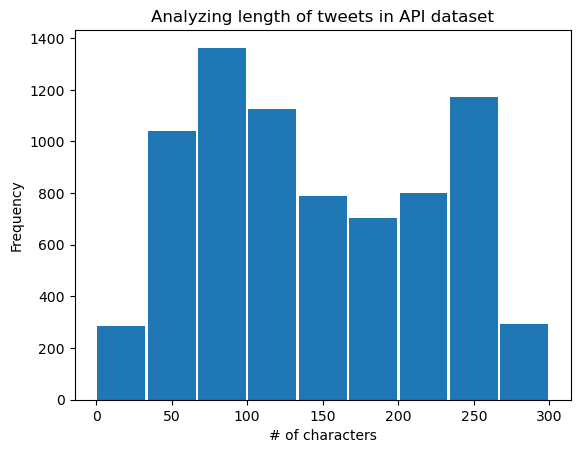

In [6]:
plot_length_hist(curr_tweet_df)
plt.title("Analyzing length of tweets in API dataset")

C:\Users\qiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Most common words in API dataset')

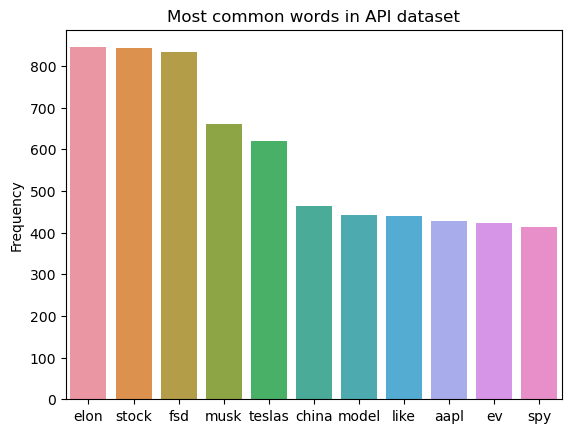

In [7]:
most_common_words(curr_tweet_df, num=54)
plt.title("Most common words in API dataset")

In [8]:
old_tweet_df = pd.read_csv("train_w_samp_sentiments.csv")

Text(0.5, 1.0, 'Analyzing length of tweets in Kaggle dataset')

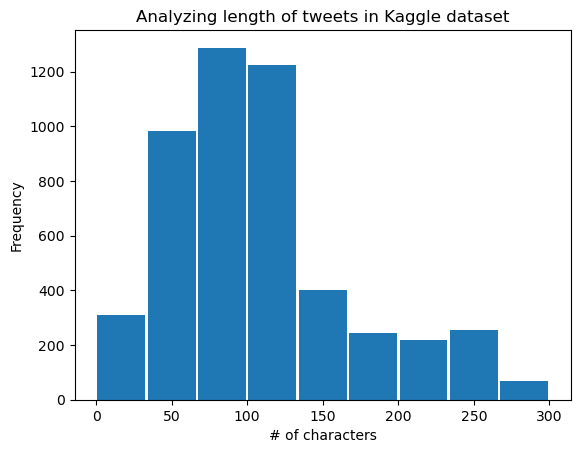

In [9]:
plot_length_hist(old_tweet_df)
plt.title("Analyzing length of tweets in Kaggle dataset")

C:\Users\qiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Most common words in Kaggle dataset')

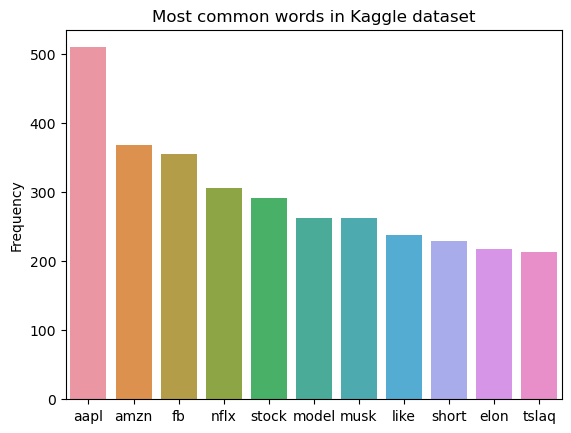

In [10]:
most_common_words(old_tweet_df, num=54)
plt.title("Most common words in Kaggle dataset")

In [11]:
def plot_pos_neut_neg_bar(df):
    num_pos = len(df[df['I(positive)'] == 1])
    num_neut = len(df[df['I(neutral)'] == 1])
    num_neg = num_pos = len(df[df['I(negative)'] == 1])

    plt.bar(['positive', 'neutral', 'negative'], [num_pos, num_neut, num_neg])
    plt.ylabel("Frequency")

Text(0.5, 1.0, 'Frequency of sentiment labels in API dataset')

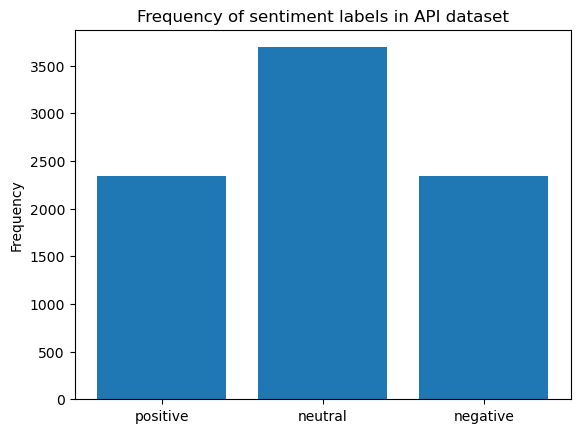

In [12]:
plot_pos_neut_neg_bar(curr_tweet_df)
plt.title("Frequency of sentiment labels in API dataset")

Text(0.5, 1.0, 'Frequency of sentiment labels in Kaggle dataset')

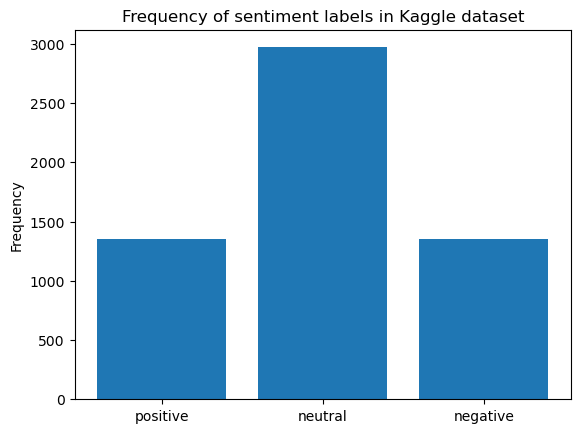

In [13]:
plot_pos_neut_neg_bar(old_tweet_df)
plt.title("Frequency of sentiment labels in Kaggle dataset")

In [14]:
def plot_score_distributions(df, title_string):
    fig, ax = plt.subplots(3)

    pos_scores = df[df['I(positive)'] == 1]['I(positive)*score']
    neut_scores = df[df['I(neutral)'] == 1]['I(neutral)*score']
    neg_scores = df[df['I(negative)'] == 1]['I(negative)*score']
    
    ax[0].hist(pos_scores, color='g', label='positive')
    ax[1].hist(neut_scores, color='b', label='neutral')
    ax[2].hist(neg_scores, color='r', label='negative')

    fig.supxlabel("Score")
    fig.supylabel("Frequency")
    fig.suptitle(title_string)
    fig.legend()
    fig.tight_layout()

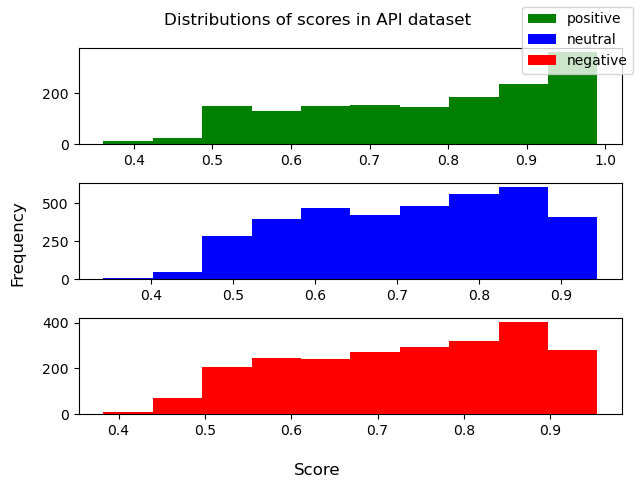

In [15]:
plot_score_distributions(curr_tweet_df, "Distributions of scores in API dataset")

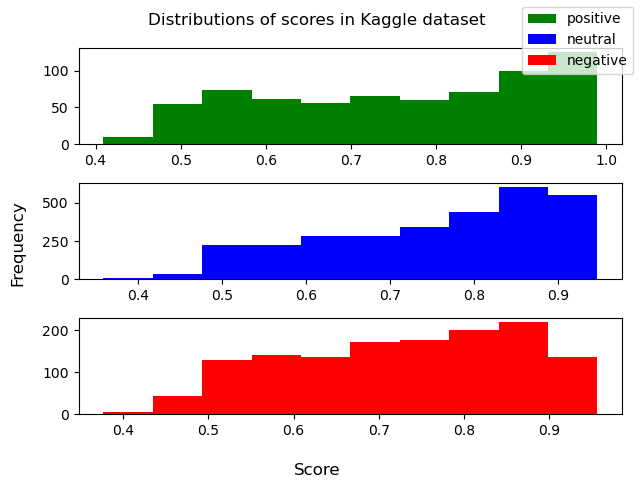

In [16]:
plot_score_distributions(old_tweet_df, "Distributions of scores in Kaggle dataset")